# <div style="text-align: center; background-color: #a2f5bf; font-family: Times New Roman;color: black; padding: 14px; line-height: 1;border-radius:14px"> Data Mining and Analysis of Shanghai's Second-Hand Housing Market</div>

![](https://p.ssl.qhimg.com/t01f418d26e97df3512.jpg?&w=96&h=54&rs=2&qlt=100)

 <h1 style='font-family: Times New Roman;'>About Second-Hand House </h1>

<h3 style = 'font-family: Times New Roman'> 
"Second-hand houses refer to properties that have previously been inhabited and subsequently resold, indicating a prior purchase and use by another individual. These properties can take various forms such as residential apartments, standalone houses, or townhouses. When the initial purchaser of a property decides to transfer or sell it to another buyer, it is classified as a second-hand house.<br>

Compared to new properties, second-hand houses may have a history of occupancy and could exhibit signs of wear and tear or past renovations. However, they often boast mature advantages in terms of location, surrounding amenities, and transportation, which might offer more choices and expedited purchasing processes for certain homebuyers.

In the transaction of second-hand houses, both buyer and seller complete the property exchange by signing a sales contract, usually involving requisite legal procedures and assistance from real estate agencies."
</h3>

<h1 style='font-family: Times New Roman;'>About Data </h1>

<h3 style = 'font-family: Times New Roman;'>
I used a web crawler to simulate browser behavior and gathered a total of  <b>9006</b>  pieces of second-hand housing information across all districts in Shanghai.<br>
You can see it in detailed in my the other notebook<br>
<br>
<b><mark>Price</mark></b> is a numerous column, which is a <b><mark>target column</mark></b> of the dataset.</h3>

# <div style="text-align: center; background-color: #a2f5bf; color: black; font-family: Times New Roman; padding: 14px; line-height: 1;border-radius:14px"> 1. Import Necessary libraries</div>

In [5]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from lightgbm.sklearn import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
import xgboost as xgb
from sklearn.svm import SVR
import torch.nn as nn
import torch
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import PolynomialFeatures
from torch.utils.data import DataLoader,TensorDataset


color_scheme = px.colors.qualitative.T10
warnings.filterwarnings('ignore')

In [6]:
house_data = pd.read_csv("house_data.csv")
house = pd.DataFrame(house_data)
house.head()




,District,Size,Floor,Year,配套成熟,环境优美,繁华地段,安全性高,交通便利,品质小区,Price
0,pudong,89.20,1,2011,False,True,False,False,False,True,54933
1,pudong,106.74,2,2010,False,False,False,False,False,False,63332
2,pudong,37.88,1,1985,False,False,False,False,False,False,84478
3,pudong,84.50,3,2006,False,False,True,True,False,False,58580
4,pudong,62.44,3,1999,False,False,False,False,False,False,66464


(9006, 11)


Text(0.5, 1.0, 'Distribution of Missing values')

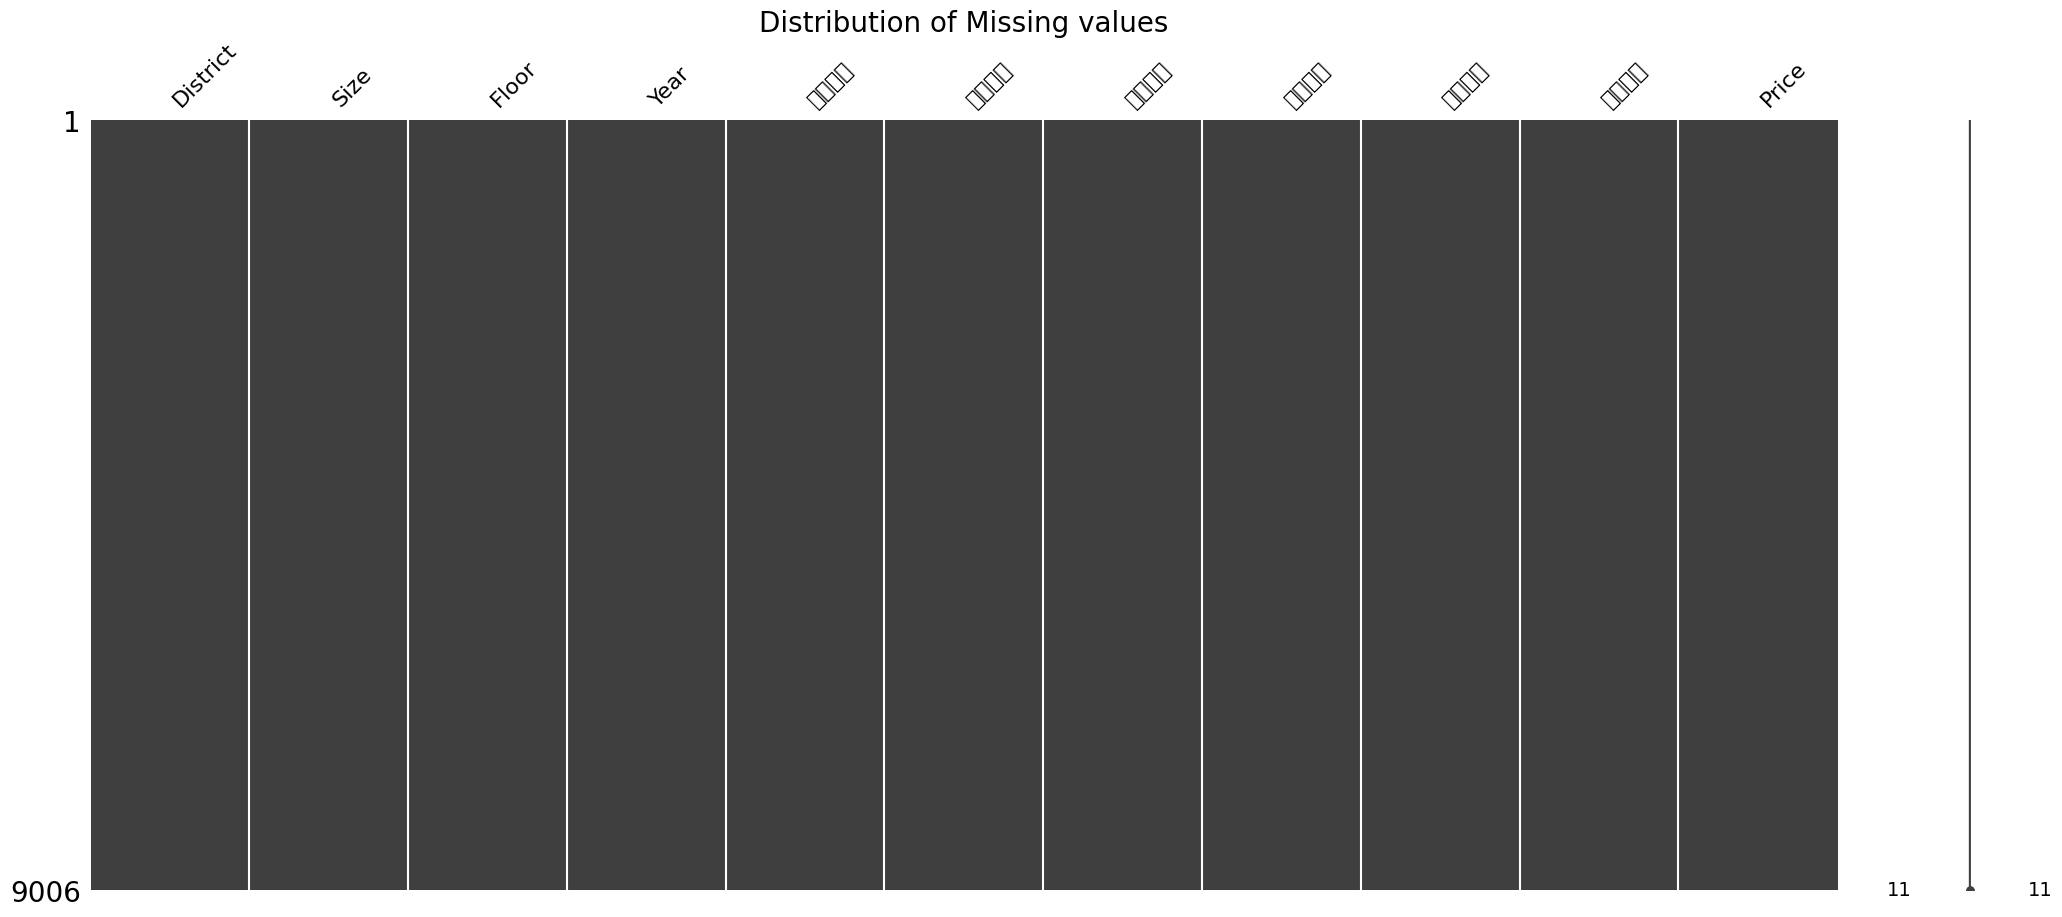

In [7]:
print(house.shape)  
msno.matrix(house)
plt.title('Distribution of Missing values',fontsize = 20)

# <div style="text-align: center; background-color:#a2f5bf;font-family: Times New Roman; color: black; padding: 14px; line-height: 1;border-radius:14px">2. Univariate Analysis</div>

## <div style=" background-color: #a2f5bf; color: white;font-family: Times New Roman; padding: 10px; line-height: 1;border-radius:8px">2.1. District</div>

In [8]:
dist_count = house['District'].value_counts()
fig = px.bar(x=dist_count.index, y=dist_count.values, color = dist_count.index, 
             color_discrete_sequence=color_scheme,text = dist_count.values, title='District')

lst = [0,1,2]
for idx in lst:
    fig.data[idx].marker.line.width = 3
    fig.data[idx].marker.line.color='black'
    
fig.update_layout(
    xaxis_title="District ",
    yaxis_title="count",
    template = 'simple_white')
fig.show()

![Image description](image/newplot1.png)

In [9]:


# 假设有不同地区的房价数据
price_district_1 = house[house['District'] == 'pudong']['Price']
price_district_2 = house[house['District'] == 'xuhui']['Price']
price_district_3 = house[house['District'] == 'jingan']['Price']
price_district_4 = house[house['District'] == 'minhang']['Price']
price_district_5 = house[house['District'] =='songjiang']['Price']
price_district_6 = house[house['District'] == 'baoshan']['Price']
price_district_7 = house[house['District'] == 'jiading']['Price']
price_district_8 = house[house['District'] == 'qingpu']['Price']
price_district_9 = house[house['District'] == 'putuo']['Price']
price_district_10 = house[house['District'] == 'yangpu']['Price']
price_district_11 = house[house['District'] == 'hongkou']['Price']
price_district_12 = house[house['District'] == 'changning']['Price']
price_district_13 = house[house['District'] == 'jinshan']['Price']
price_district_14 = house[house['District'] == 'fengxian']['Price']
price_district_15 = house[house['District'] == 'chongming']['Price']
price_district_16 = house[house['District'] == 'huangpu']['Price']


# 执行单因素方差分析
f_statistic, p_value = f_oneway(price_district_1, price_district_2, price_district_3, price_district_4, price_district_5, price_district_6, price_district_7, price_district_8, price_district_9, price_district_10, price_district_11, price_district_12, price_district_13, price_district_14, price_district_15, price_district_16)

# 输出结果
print("F-statistic:", f_statistic)
print("P-value:", p_value)
print('reject H_0,there were significant differences between the groups')


F-statistic: 221.6182835411514
P-value: 0.0
reject H_0,there were significant differences between the groups


In [10]:

avg_price_by_district = house.groupby('District')['Price'].mean().reset_index()
avg_price_by_district['Price'] = avg_price_by_district['Price'].astype(int) 

avg_price_by_district = avg_price_by_district.sort_values(by='Price', ascending=False)

fig = px.bar(avg_price_by_district, x='District', y='Price', color='District',
             color_discrete_sequence=px.colors.qualitative.Vivid,
             text='Price', title='Average House Price by District')

lst = [0,1,2]
for idx in lst:
    fig.data[idx].marker.line.width = 3
    fig.data[idx].marker.line.color='black'
    
fig.update_layout(
    xaxis_title="District",
    yaxis_title="Average Price",
    template='simple_white'
)

# 显示图表
fig.show()


![Image description](image/newplot2.png)

## <div style=" background-color: #a2f5bf; color: white;font-family: Times New Roman; padding: 10px; line-height: 1;border-radius:8px">2.2. Size</div>

In [11]:


bins_Area = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 10000]
house['Area Range'] = pd.cut(house['Size'], bins_Area)
area_count = house['Area Range'].value_counts().reset_index()  
area_count.columns = ['Area Range', 'Count']  
area_count['Area Range'] = area_count['Area Range'].astype(str)

fig = px.pie(area_count, values='Count', names='Area Range', 
             color_discrete_sequence=px.colors.qualitative.Vivid,
             title='House Count in Different Area Ranges')

fig.update_traces(textinfo='label+percent', textfont_size=10,
                  marker=dict(line=dict(color='#100000', width=0.2)))
fig.data[0].marker.line.width = 0.2
fig.data[0].marker.line.color = 'gray'

fig.show()


![Image description](image/newplot3.png)

In [12]:


avg_price_by_area = house.groupby('Area Range')['Price'].mean().reset_index()
avg_price_by_area['Price'] = avg_price_by_area['Price'].astype(int)

avg_price_by_area['Area Range'] = avg_price_by_area['Area Range'].astype(str)

fig = px.bar(avg_price_by_area, x='Area Range', y='Price', color='Area Range',
             color_discrete_sequence=px.colors.qualitative.Vivid,
             text='Price', title='Average House Price by Areas')

fig.update_layout(
    xaxis_title="Area Range",
    yaxis_title="Average Price",
    template='simple_white'
)

fig.show()



![Image description](image/newplot4.png)

## <div style=" background-color: #a2f5bf; color: white;font-family: Times New Roman; padding: 10px; line-height: 1;border-radius:8px">2.3.Floor</div>

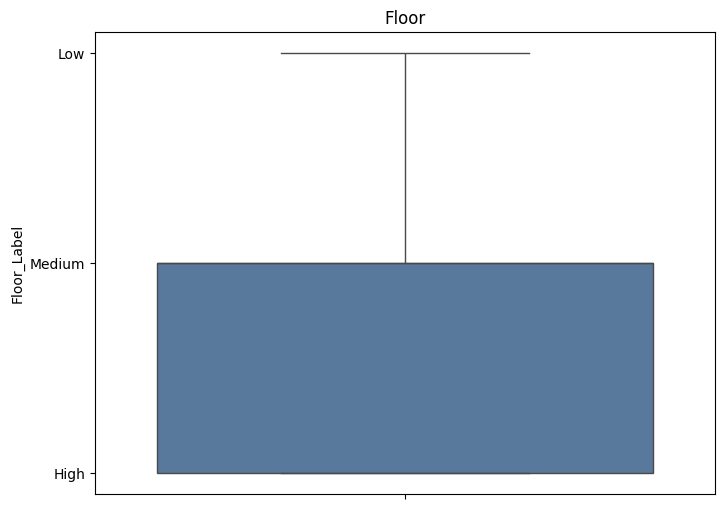

In [13]:
house['Floor_Label'] = house['Floor'].map({3: 'High', 2: 'Medium', 1: 'Low'})

fig, ax1 = plt.subplots()
fig.set_size_inches(8, 6)

sns.boxplot(data=house['Floor_Label'], ax=ax1, color=color_scheme[0])
ax1.set_title('Floor')

plt.show()


In [14]:

avg_price_by_district = house.groupby('Floor_Label')['Price'].mean().reset_index()
avg_price_by_district['Price'] = avg_price_by_district['Price'].astype(int) 

avg_price_by_district = avg_price_by_district.sort_values(by='Price', ascending=False)

fig = px.bar(avg_price_by_district, x='Floor_Label', y='Price', color='Floor_Label',
             color_discrete_sequence=px.colors.qualitative.Vivid,
             text='Price', title='Average House Price by District')


fig.update_layout(
    xaxis_title="Floor",
    yaxis_title="Average Price",
    template='simple_white'
)

fig.show()


![Image description](image/newplot5.png)

## <div style=" background-color: #a2f5bf; color: white;font-family: Times New Roman; padding: 10px; line-height: 1;border-radius:8px">2.4.Year</div>

In [15]:
bins_Year = [1,1980,1985,1990,1995,2000,2005,2010,2015,2020,2025]
house['Year Range'] = pd.cut(house['Year'], bins_Year)
year_count = house['Year Range'].value_counts().reset_index()  
year_count.columns = ['Year Range', 'Count']  
year_count['Year Range'] = year_count['Year Range'].astype(str)

fig = px.pie(year_count, values='Count', names='Year Range', 
             color_discrete_sequence=px.colors.qualitative.Vivid,
             title='House Count in Different Year Ranges')

fig.update_traces(textinfo='label+percent', textfont_size=10,
                  marker=dict(line=dict(color='#100000', width=0.2)))
fig.data[0].marker.line.width = 0.2
fig.data[0].marker.line.color = 'gray'

fig.show()

![Image description](image/newplot6.png)

In [16]:


avg_price_by_year = house.groupby('Year Range')['Price'].mean().reset_index()
avg_price_by_year['Price'] = avg_price_by_year['Price'].astype(int)
avg_price_by_year['Year Range'] = avg_price_by_year['Year Range'].astype(str)

fig = px.bar(avg_price_by_year, x='Year Range', y='Price', color='Year Range',
             color_discrete_sequence=px.colors.qualitative.Vivid,
             text='Price', title='Average House Price by Years')

fig.update_layout(
    xaxis_title="Year Range",
    yaxis_title="Average Price",
    template='simple_white'
)

fig.show()

![Image description](image/newplot7.png)

## <div style=" background-color: #a2f5bf; color: white;font-family: Times New Roman; padding: 10px; line-height: 1;border-radius:8px">2.5.Quaility</div>

In [17]:
bool_columns = ['配套成熟','环境优美','繁华地段','安全性高','交通便利','品质小区']
mean_prices = []

for column in bool_columns:
    mean_price = house.loc[house[column], 'Price'].mean()
    mean_prices.append(mean_price)

# 创建 DataFrame 显示结果
avg_price_by_tag = pd.DataFrame({'tag': bool_columns, 'Price': mean_prices})
avg_price_by_tag['Price'] = avg_price_by_tag['Price'].astype(int)
fig = px.bar(avg_price_by_tag, x='tag', y='Price', color='tag',
             color_discrete_sequence=px.colors.qualitative.Vivid,
             text='Price', title='Average House Price by different tags')

fig.update_layout(
    xaxis_title="tag",
    yaxis_title="Average Price",
    template='simple_white'
)

fig.show()


![Image description](image/newplot8.png)

# <div style="text-align: center; background-color: #a2f5bf; color: black; font-family: Times New Roman; padding: 14px; line-height: 1;border-radius:14px"> 3. Correlation Analysis</div>

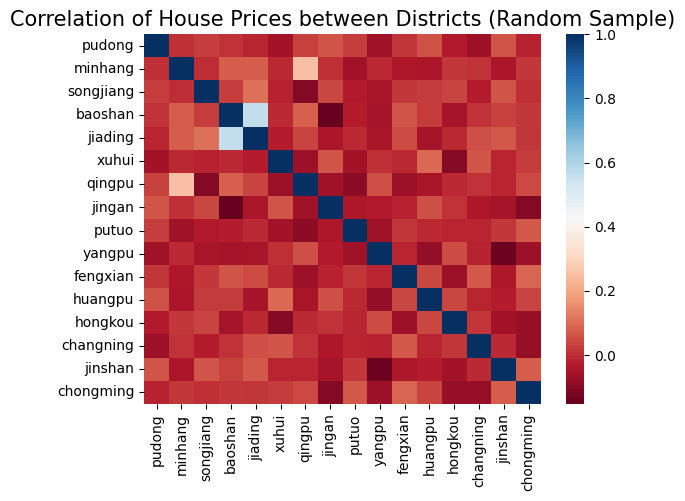

In [18]:
districts = house['District'].unique()
district_corr = pd.DataFrame(index=districts, columns=districts)

# 对每个地区进行随机抽样，计算不同地区房价样本之间的相关性
sample_size = 400  # 每个地区的样本数量
for district1 in districts:
    # 获取当前地区的所有房价数据
    prices1_all = house[house['District'] == district1]['Price']
    # 随机抽样
    prices1_sample = prices1_all.sample(min(sample_size, len(prices1_all)), random_state=1)
    
    for district2 in districts:
        # 获取另一个地区的所有房价数据
        prices2_all = house[house['District'] == district2]['Price']
        # 随机抽样
        prices2_sample = prices2_all.sample(min(sample_size, len(prices2_all)), random_state=1)
        
        # 计算相关系数并存储到 DataFrame 中
        correlation = np.corrcoef(prices1_sample, prices2_sample)[0, 1]
        district_corr.loc[district1, district2] = correlation

# 显示热力图
sns.heatmap(district_corr.astype(float), cmap="RdBu", annot=False, cbar=True)
plt.title("Correlation of House Prices between Districts (Random Sample)", size=15)
plt.show()

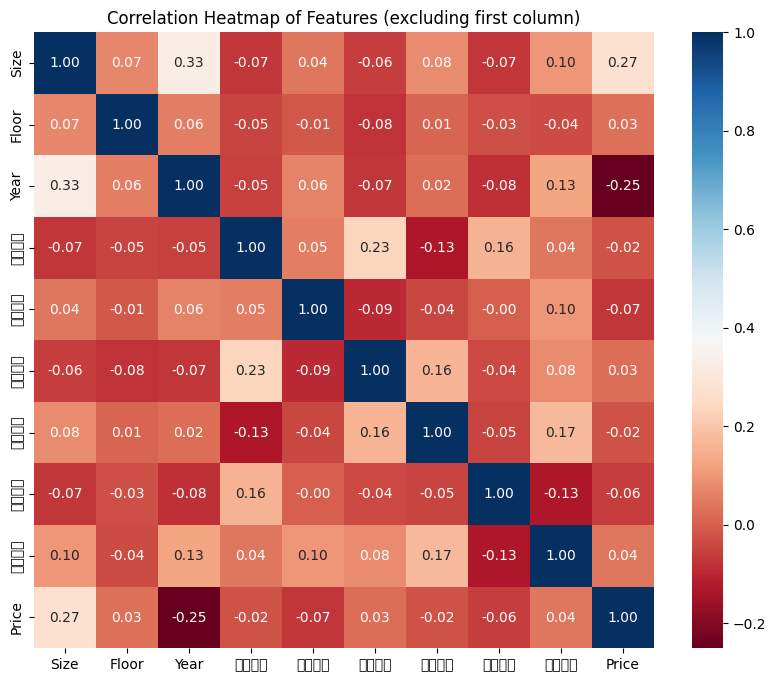

In [19]:
features = house.iloc[:, 1:-3]

# 计算特征之间的相关系数矩阵
correlation_matrix = features.corr()

# 绘制热力图
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', fmt='.2f')
plt.title('Correlation Heatmap of Features (excluding first column)')
plt.show()

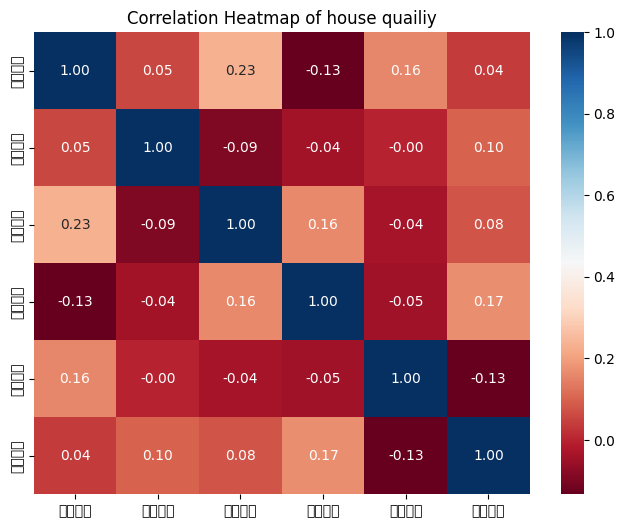

In [20]:
bool_columns = ['配套成熟','环境优美','繁华地段','安全性高','交通便利','品质小区']
bool_data = house[bool_columns]
bool_corr = bool_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(bool_corr, annot=True, cmap='RdBu', fmt=".2f")
plt.title('Correlation Heatmap of house quailiy')
plt.show()


# <div style="text-align: center; background-color: #a2f5bf; color: black; font-family: Times New Roman; padding: 14px; line-height: 1;border-radius:14px"> 4.Analysis of housing prices built from 2011 to 2020
</div>

We found the second-hand house price built in 2011-2020 has low price

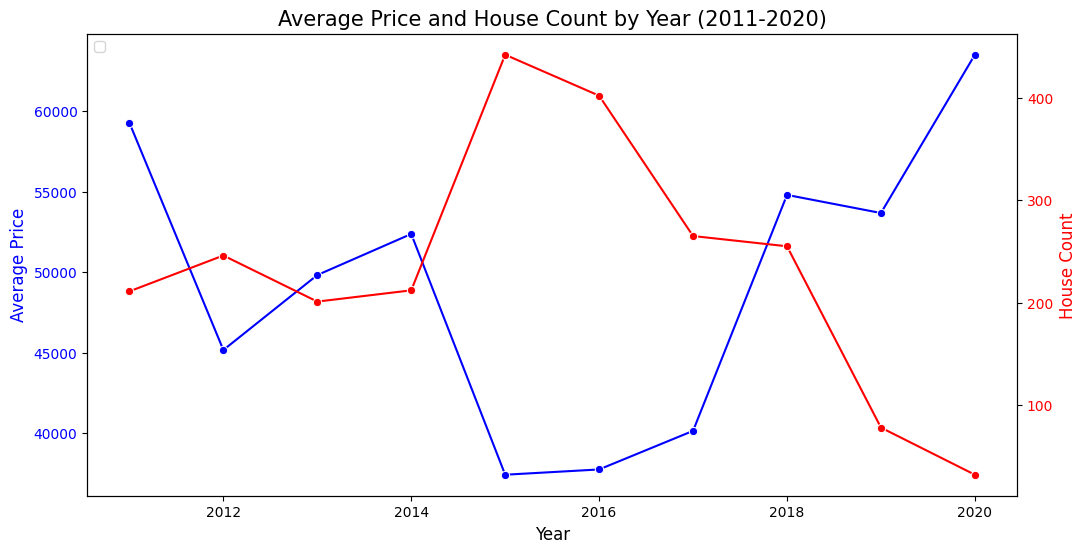

In [21]:
house_hat =house[(house['Year'] > 2010) & (house['Year'] <= 2020)]

avg_price_by_year_hat = house_hat.groupby('Year')['Price'].mean().reset_index()
avg_price_by_year_hat['Price'] = avg_price_by_year_hat['Price'].astype(int)

year_count = house_hat['Year'].value_counts().reset_index() 
year_count.columns = ['Year', 'Count'] 

#plot
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Average Price', fontsize=12, color='blue')
line1 = sns.lineplot(data=avg_price_by_year_hat, x='Year', y='Price', marker='o', color='blue', ax=ax1)
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.set_ylabel('House Count', fontsize=12, color='red')
line2 = sns.lineplot(data=year_count, x='Year', y='Count', marker='o', color='red', ax=ax2)
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Average Price and House Count by Year (2011-2020)', fontsize=15)
lines = [line1, line2]
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc='upper left')

plt.show()


In [22]:
house_hat =house[(house['Year'] > 2014) & (house['Year'] <= 2016)]
dis_count = house_hat['District'].value_counts().reset_index()  
dis_count.columns = ['District', 'Count']  

fig = px.pie(dis_count, values='Count', names='District', 
             color_discrete_sequence=px.colors.qualitative.Vivid,
             title='House Count in Different Districts(2015-2016)')

fig.update_traces(textinfo='label+percent', textfont_size=10,
                  marker=dict(line=dict(color='#100000', width=0.2)))
fig.data[0].marker.line.width = 0.2
fig.data[0].marker.line.color = 'gray'
fig.show()


![Image description](image/newplot9.png)

In [23]:

area_count = house_hat['Area Range'].value_counts().reset_index()  
area_count.columns = ['Area Range', 'Count']  
area_count['Area Range'] = area_count['Area Range'].astype(str)

fig = px.pie(area_count, values='Count', names='Area Range', 
             color_discrete_sequence=px.colors.qualitative.Vivid,
             title='House Count in Different Area Ranges(2015-2016)')

fig.update_traces(textinfo='label+percent', textfont_size=10,
                  marker=dict(line=dict(color='#100000', width=0.2)))
fig.data[0].marker.line.width = 0.2
fig.data[0].marker.line.color = 'gray'

fig.show()


![Image description](image/newplot10.png)

In [24]:
avg_price_by_district_hat = house_hat.groupby('District')['Price'].mean().reset_index()
avg_price_by_district_hat['Price'] = avg_price_by_district_hat['Price'].astype(int) 

avg_price_by_district = avg_price_by_district_hat.sort_values(by='Price', ascending=False)

fig = px.bar(avg_price_by_district, x='District', y='Price', color='District',
             color_discrete_sequence=px.colors.qualitative.Vivid,
             text='Price', title='Average House Price by District(2015-2016)')

lst = [0,1,2]
for idx in lst:
    fig.data[idx].marker.line.width = 3
    fig.data[idx].marker.line.color='black'
    
fig.update_layout(
    xaxis_title="District",
    yaxis_title="Average Price",
    template='simple_white'
)

# 显示图表
fig.show()

![Image description](image/newplot11.png)

# <div style="text-align: center; background-color: #a2f5bf; color: black; font-family: Times New Roman; padding: 14px; line-height: 1;border-radius:14px"> 5.Model
</div>

## <div style=" background-color: #a2f5bf; color: white;font-family: Times New Roman; padding: 10px; line-height: 1;border-radius:8px">5.1.Feature Extract</div>

In [25]:
data = house.iloc[:,:-3]
data.head()

,District,Size,Floor,Year,配套成熟,环境优美,繁华地段,安全性高,交通便利,品质小区,Price
0,pudong,89.20,1,2011,False,True,False,False,False,True,54933
1,pudong,106.74,2,2010,False,False,False,False,False,False,63332
2,pudong,37.88,1,1985,False,False,False,False,False,False,84478
3,pudong,84.50,3,2006,False,False,True,True,False,False,58580
4,pudong,62.44,3,1999,False,False,False,False,False,False,66464


In [26]:
base_year = 2015
data['Year'] = data['Year'] - base_year

district_dummies = pd.get_dummies(data['District'])
data = data.drop(data.columns[0], axis=1)
data = pd.concat([district_dummies,data], axis=1)
data= data.sample(frac=1, random_state=42)  # frac=1 表示抽样比例为 100%，实现完全随机排列
data.head()

,baoshan,changning,chongming,fengxian,hongkou,huangpu,jiading,jingan,jinshan,minhang,...,Size,Floor,Year,配套成熟,环境优美,繁华地段,安全性高,交通便利,品质小区,Price
8693,False,False,True,False,False,False,False,False,False,False,...,92.57,1,-6,True,True,False,False,False,False,14044
6566,False,False,False,False,False,True,False,False,False,False,...,60.00,3,0,False,False,True,False,False,True,77334
7501,False,True,False,False,False,False,False,False,False,False,...,70.47,3,-23,False,False,False,False,False,False,59600
3131,False,False,False,False,False,False,False,False,False,False,...,47.80,2,-35,False,False,True,False,False,False,81590
932,False,False,False,False,False,False,False,False,False,True,...,56.00,3,-2,True,False,True,False,False,False,73215


## <div style=" background-color: #a2f5bf; color: white;font-family: Times New Roman; padding: 10px; line-height: 1;border-radius:8px">5.2.Splitting the dataset</div>

In [27]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)

(7204, 25)


## <div style=" background-color: #a2f5bf; color: white;font-family: Times New Roman; padding: 10px; line-height: 1;border-radius:8px">5.3.Modeling</div>

# Use Machine Learning Approaches

In [28]:
#设立评估标准
def rmse_cv(model):
    rmse_cv = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=10)).mean()
    return rmse_cv

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

In [29]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])
models.head()

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)


# Linear Regression

In [30]:
lin_reg = LinearRegression()    
lin_reg.fit(X_train,y_train)
y_hat = lin_reg.predict(X_test)
mae,mse,rmse,r_squared = evaluation(y_test,y_hat)
rmse_cross_val = rmse_cv(lin_reg)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
print("RMSE Cross-Validation:", rmse_cross_val)
 

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = pd.concat([models, pd.DataFrame(new_row,index=[0])], ignore_index=True)


MAE: 14471.31048404981
MSE: 358063171.8449737
RMSE: 18922.557222663476
R2 Score: 0.3855267740058912
------------------------------
RMSE Cross-Validation: 19417.16434436003


# Ridge Regression

In [31]:
Rid_reg = Ridge()
Rid_reg.fit(X_train,y_train)
y_hat = Rid_reg.predict(X_test)
mae,mse,rmse,r_squared = evaluation(y_test,y_hat)
rmse_cross_val = rmse_cv(lin_reg)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
print("RMSE Cross-Validation:", rmse_cross_val)
 

new_row = {"Model": "RidgeRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = pd.concat([models, pd.DataFrame(new_row,index=[1])], ignore_index=True)

MAE: 14468.246129897843
MSE: 358022641.17553556
RMSE: 18921.486230619823
R2 Score: 0.3855963288028088
------------------------------
RMSE Cross-Validation: 19417.16434436003


# Lasso Regression

In [32]:
lasso = Lasso()
lasso.fit(X_train, y_train)
predictions = lasso.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lasso)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LassoRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = pd.concat([models, pd.DataFrame(new_row,index=[1])], ignore_index=True)

MAE: 14469.192664665232
MSE: 358044311.8169661
RMSE: 18922.0588683411
R2 Score: 0.38555913975351175
------------------------------
RMSE Cross-Validation: 19417.15933844887


# Elastic Net

In [33]:
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
predictions = elastic_net.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(elastic_net)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "ElasticeNetRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = pd.concat([models, pd.DataFrame(new_row,index=[1])], ignore_index=True)

MAE: 14888.07091672897
MSE: 437028035.97381014
RMSE: 20905.215520864887
R2 Score: 0.2500149464380995
------------------------------
RMSE Cross-Validation: 21695.862202178632


# SVR

In [34]:
svr = SVR(C=100000)
svr.fit(X_train, y_train)
predictions = svr.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(svr)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "SVR","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = pd.concat([models, pd.DataFrame(new_row,index=[1])], ignore_index=True)

MAE: 13667.530078966733
MSE: 416122162.80955213
RMSE: 20399.07259680087
R2 Score: 0.2858915747416301
------------------------------
RMSE Cross-Validation: 20915.74479064171


# Random Forest

In [35]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(random_forest)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = pd.concat([models, pd.DataFrame(new_row,index=[1])], ignore_index=True)

MAE: 7207.322191383271
MSE: 167183035.40828022
RMSE: 12929.927896484196
R2 Score: 0.7130967181866701
------------------------------
RMSE Cross-Validation: 13164.770318942994


# XGboost

In [36]:
xgb = XGBRegressor(n_estimators=1000, learning_rate = 0.1,reg_lambda = 0.1)
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(xgb)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "XGBRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = pd.concat([models, pd.DataFrame(new_row,index=[1])], ignore_index=True)

MAE: 7049.00257499263
MSE: 167659906.90596366
RMSE: 12948.35537456258
R2 Score: 0.7122783576553249
------------------------------
RMSE Cross-Validation: 13166.190274578355


# LGBM

In [37]:
lgbm = LGBMRegressor(n_estimators=1000,learning_rate=0.1,num_leaves=100,reg_lambda=0.2,reg_alpha=0.3,objective='RMSE')
lgbm.fit(X_train, y_train)
predictions = lgbm.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lgbm)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LGBMRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = pd.concat([models, pd.DataFrame(new_row,index=[1])], ignore_index=True)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000680 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 351
[LightGBM] [Info] Number of data points in the train set: 7204, number of used features: 25
[LightGBM] [Info] Start training from score 59564.838423
MAE: 7154.131900588244
MSE: 165584491.9300858
RMSE: 12867.963783368596
R2 Score: 0.7158399831889788
------------------------------
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000276 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 351
[LightGBM] [Info] Number of data points in the train set: 8105, number of used features: 25
[LightGBM] [Info] Start training from score 59576.359531
[LightGBM] [Info] Auto-choosing row-wise multi-thread

# Catboost

In [38]:
catboost = CatBoostRegressor(learning_rate=0.2,n_estimators=1000,reg_lambda=0.5,logging_level='Silent')
catboost.fit(X_train, y_train)
predictions = catboost.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(catboost)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "CatBoostRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = pd.concat([models, pd.DataFrame(new_row,index=[1])], ignore_index=True)


MAE: 7788.241168470339
MSE: 166748627.8486951
RMSE: 12913.118440124954
R2 Score: 0.71384220623326
------------------------------
RMSE Cross-Validation: 13247.83153751636


# Poly Regression

In [39]:
poly_reg = PolynomialFeatures(degree=2)
X_train_2d = poly_reg.fit_transform(X_train)
X_test_2d = poly_reg.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_2d, y_train)
predictions = lin_reg.predict(X_test_2d)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Polynomial Regression (degree=2)","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = pd.concat([models, pd.DataFrame(new_row,index=[1])], ignore_index=True)
models.head(20)

MAE: 12262.298338251823
MSE: 272519825.33640045
RMSE: 16508.174500422523
R2 Score: 0.5323279538664465
------------------------------
RMSE Cross-Validation: 19417.16434436003


,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
0,LinearRegression,14471.310484,3.580632e+08,18922.557223,0.385527,19417.164344
1,RidgeRegression,14468.246130,3.580226e+08,18921.486231,0.385596,19417.164344
2,LassoRegression,14469.192665,3.580443e+08,18922.058868,0.385559,19417.159338
3,ElasticeNetRegression,14888.070917,4.370280e+08,20905.215521,0.250015,21695.862202
4,SVR,13667.530079,4.161222e+08,20399.072597,0.285892,20915.744791
5,RandomForestRegressor,7207.322191,1.671830e+08,12929.927896,0.713097,13164.770319
6,XGBRegressor,7049.002575,1.676599e+08,12948.355375,0.712278,13166.190275
7,LGBMRegressor,7154.131901,1.655845e+08,12867.963783,0.715840,13018.219187
8,CatBoostRegressor,7788.241168,1.667486e+08,12913.118440,0.713842,13247.831538
9,Polynomial Regression (degree=2),12262.298338,2.725198e+08,16508.174500,0.532328,19417.164344


# Nerual Network

In [40]:
X_train_ = X_train.astype(int)
X_test_ = X_test.astype(int)
y_train_ = y_train.astype(int)
y_test_ = y_test.astype(int)
X_train_tensor = torch.tensor(X_train_.values,dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_.values,dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_.values,dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_.values,dtype=torch.float32)
train_set = TensorDataset(X_train_tensor,y_train_tensor)
test_set = TensorDataset(X_test_tensor,y_test_tensor)
batch_size = 1000

class net(nn.Module):
    def __init__(self):
        super(net,self).__init__()
        self.l1 = nn.Linear(25,1)
        nn.init.constant_(self.l1.weight, 1)
        nn.init.constant_(self.l1.bias, 1)
        self.ac = nn.LeakyReLU()

    def forward(self,x):
        x = self.l1(x)
        
       # x = self.l2(self.ac(x))
        
        #x = self.l3(self.ac(x))
        return x


model = net()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.0001)
train_loader = DataLoader(train_set,shuffle= True,batch_size=batch_size)
test_loader = DataLoader(test_set,shuffle= False,batch_size=batch_size)
    


def train(epoch):
    for batch_idx,data in enumerate(train_loader,0):
        inputs,target = data
        optimizer.zero_grad()
        outputs = model(inputs)
        #print(outputs[1],target[1])
        loss = criterion(outputs,target)
        loss.backward()
        optimizer.step()

        
    print(f"[Train] epoch: {epoch}/{10}, loss: {loss}")
train(2)
predictions = model(X_test_tensor)
predictions = predictions.detach().numpy()
mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

new_row = {"Model": "Network","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = pd.concat([models, pd.DataFrame(new_row,index=[1])], ignore_index=True)
models.head(20)

[Train] epoch: 2/10, loss: 1126304896.0
MAE: 20447.692786010335
MSE: 665827108.953202
RMSE: 25803.625887715898
R2 Score: -0.14262779242189794
------------------------------


,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
0,LinearRegression,14471.310484,3.580632e+08,18922.557223,0.385527,19417.164344
1,RidgeRegression,14468.246130,3.580226e+08,18921.486231,0.385596,19417.164344
2,LassoRegression,14469.192665,3.580443e+08,18922.058868,0.385559,19417.159338
3,ElasticeNetRegression,14888.070917,4.370280e+08,20905.215521,0.250015,21695.862202
4,SVR,13667.530079,4.161222e+08,20399.072597,0.285892,20915.744791
5,RandomForestRegressor,7207.322191,1.671830e+08,12929.927896,0.713097,13164.770319
6,XGBRegressor,7049.002575,1.676599e+08,12948.355375,0.712278,13166.190275
7,LGBMRegressor,7154.131901,1.655845e+08,12867.963783,0.715840,13018.219187
8,CatBoostRegressor,7788.241168,1.667486e+08,12913.118440,0.713842,13247.831538
9,Polynomial Regression (degree=2),12262.298338,2.725198e+08,16508.174500,0.532328,19417.164344


# <div style="text-align: center; background-color: #a2f5bf; color: black; font-family: Times New Roman; padding: 14px; line-height: 1;border-radius:14px"> 6.Model Score Comparison
</div>

In [41]:
models.sort_values(by="RMSE")

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
7,LGBMRegressor,7154.131901,1.655845e+08,12867.963783,0.715840,13018.219187
8,CatBoostRegressor,7788.241168,1.667486e+08,12913.118440,0.713842,13247.831538
5,RandomForestRegressor,7207.322191,1.671830e+08,12929.927896,0.713097,13164.770319
6,XGBRegressor,7049.002575,1.676599e+08,12948.355375,0.712278,13166.190275
9,Polynomial Regression (degree=2),12262.298338,2.725198e+08,16508.174500,0.532328,19417.164344
1,RidgeRegression,14468.246130,3.580226e+08,18921.486231,0.385596,19417.164344
2,LassoRegression,14469.192665,3.580443e+08,18922.058868,0.385559,19417.159338
0,LinearRegression,14471.310484,3.580632e+08,18922.557223,0.385527,19417.164344
4,SVR,13667.530079,4.161222e+08,20399.072597,0.285892,20915.744791
3,ElasticeNetRegression,14888.070917,4.370280e+08,20905.215521,0.250015,21695.862202


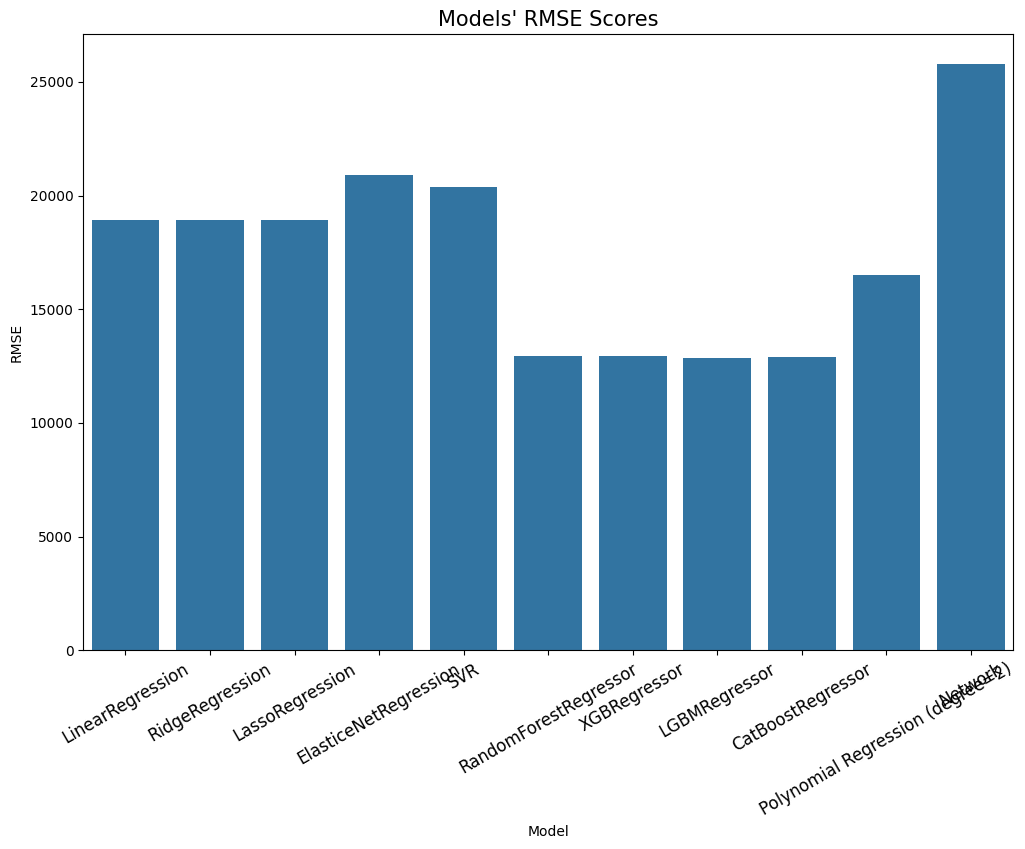

In [42]:
plt.figure(figsize=(12,8))
sns.barplot(x=models["Model"], y=models["RMSE"])
plt.title("Models' RMSE Scores", size=15)
plt.xticks(rotation=30, size=12)
plt.show()

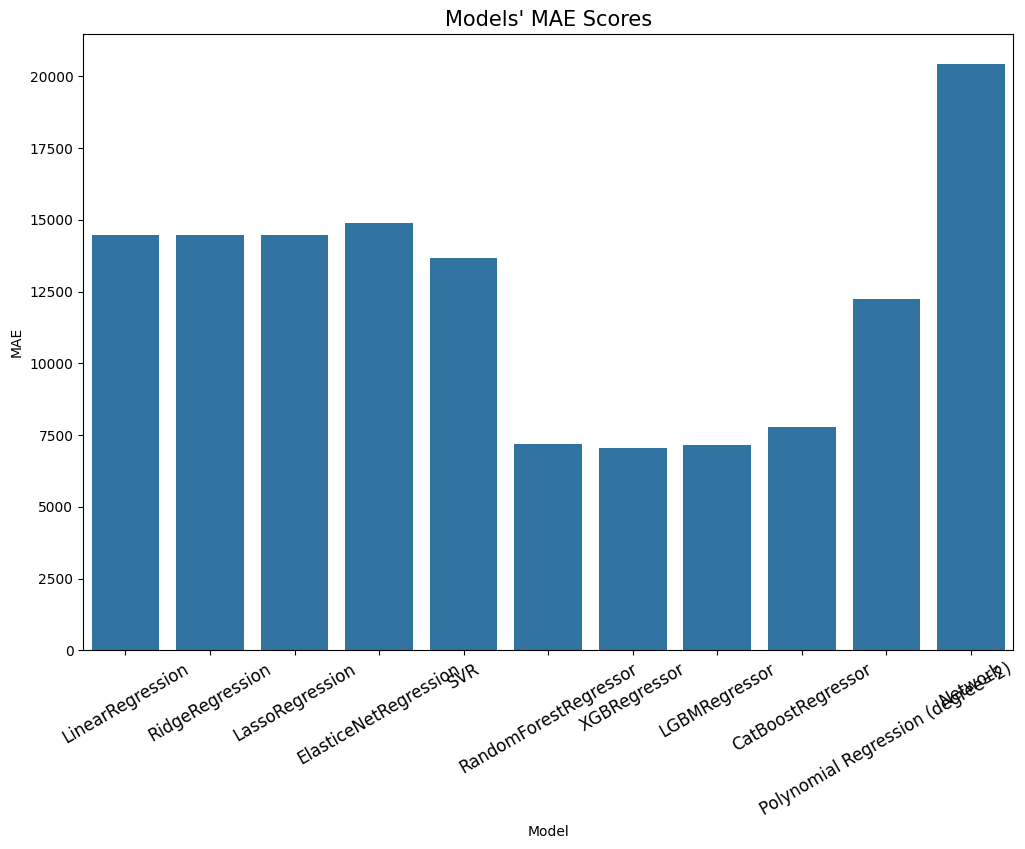

In [44]:
plt.figure(figsize=(12,8))
sns.barplot(x=models["Model"], y=models["MAE"])
plt.title("Models' MAE Scores", size=15)
plt.xticks(rotation=30, size=12)
plt.show()

In [43]:
models.sort_values(by="R2 Score",ascending=False)

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
7,LGBMRegressor,7154.131901,1.655845e+08,12867.963783,0.715840,13018.219187
8,CatBoostRegressor,7788.241168,1.667486e+08,12913.118440,0.713842,13247.831538
5,RandomForestRegressor,7207.322191,1.671830e+08,12929.927896,0.713097,13164.770319
6,XGBRegressor,7049.002575,1.676599e+08,12948.355375,0.712278,13166.190275
9,Polynomial Regression (degree=2),12262.298338,2.725198e+08,16508.174500,0.532328,19417.164344
1,RidgeRegression,14468.246130,3.580226e+08,18921.486231,0.385596,19417.164344
2,LassoRegression,14469.192665,3.580443e+08,18922.058868,0.385559,19417.159338
0,LinearRegression,14471.310484,3.580632e+08,18922.557223,0.385527,19417.164344
4,SVR,13667.530079,4.161222e+08,20399.072597,0.285892,20915.744791
3,ElasticeNetRegression,14888.070917,4.370280e+08,20905.215521,0.250015,21695.862202
